In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/dacon 기후기술분류 ai 데이터/train.csv")
labels = pd.read_csv("/content/drive/MyDrive/dacon 기후기술분류 ai 데이터/labels_mapping.csv")

# 0. EDA

In [ ]:
labels

,label,소분류
0,0,00. NaN
1,1,01. 원자력 발전
2,2,02. 핵융합 발전
3,3,03. 청정화력발전·효율화
4,4,04. 수력
5,5,05. 태양광
6,6,06. 태양열
7,7,07. 지열
8,8,08. 풍력
9,9,09. 해양에너지


label을 dictionary로 만들기

In [ ]:
labels_dict={}
z=0
for i in range(len(labels)):
  #print(labels.loc[i,'소분류'])
  labels_dict[labels.loc[i,'소분류'][4:]]=z
  z+=1
print(labels_dict)

{'NaN': 0, '원자력 발전': 1, '핵융합 발전': 2, '청정화력발전·효율화': 3, '수력': 4, '태양광': 5, '태양열': 6, '지열': 7, '풍력': 8, '해양에너지': 9, '바이오에너지': 10, '폐기물': 11, '수소 제조': 12, '연료전지': 13, '전력 저장': 14, '수소 저장': 15, '송배전 시스템': 16, '전기 지능화 기기': 17, '수송 효율화': 18, '산업 효율화': 19, '건축 효율화': 20, 'CCUS': 21, 'Non-CO2저감 ': 22, '유전자원·유전개량': 23, '작물재배·생산': 24, '가축 질병관리': 25, '가공·저장·유통': 26, '수계·수생태계': 27, '수자원 확보 및 공급': 28, '수처리': 29, '수재해 관리': 30, '기후 예측 및 모델링': 31, '기후 정보 경보 시스템': 32, '해양생태계': 33, '수산자원': 34, '연안 재해 관리': 35, '감염 질병 관리': 36, '식품 안전 예방': 37, '산림 생산 증진': 38, '산림피해저감': 39, '생태·모니터링·복원': 40, '신재생에너지 하이브리드': 41, '저전력 소모 장비': 42, '에너지 하베스팅': 43, '인공광합성': 44, '기타 기후변화 관련 기술': 45}


train data 174304개 존재

요약문 키워드를 한글과 영문 둘 다 줌

In [ ]:
train

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0
2,2,2016,중소기업기술혁신개발,중소기업청,신규,혁신기업기술개발,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n* 소비자 및 바...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,* 국내 독자적인 비목질계 셀룰로오스 자원의 파이버 및 부직포 제조 등의 기술 확보...,"기능성 샐룰로오스 파이버,천연섬유,기능성 부직포,뷰티&amp;케어 제품,미용 솜","functional cellulose fiber,natural fiber,funct...",0
3,3,2018,창업성장기술개발(R&D),중소벤처기업부,신규,창업사업화연계과제,소화기 암 진단용 분자영상 형광프로브 개발,# 암특이적 바이오마커 발굴 및 바이오마커에 대한 프로브 개발\n\n\n1) 소화...,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,# 암 진단기술의 차별성: 소화기 암 특이 프로브 개발\n\n\n- 최근 체외진단시...,"분자 진단,형광 조영제,프로브,항체,대장암","Molecular diagnosis,Fluorescence,probe,antibod...",0
4,4,2016,이공학개인기초연구지원,교육부,계속,기본연구지원,위암환자의 항암제반응예측을 위한 BRCA 발현검사,"수술이 불가능한 위암환자는 생존기간은 10개월 안팎에 지나지 않고, 항암화학요법에 ...",-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,-본 연구는 파라핀보관조직에서 in situ hybridization로 mRNA 및...,"BRCA,제자리부합법,조직미세배열,마이크로RNA,위암,항암제반응,젊은 연령/가족성 위암","BRCA,Insituhybridization,tissuemicroarray,micr...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174299,174299,2016,개인연구지원,미래창조과학부,신규,중견연구,혈관내막 증식을 치료하기 위한 표적분자 발굴,"증식성 혈관질환과 염증반응과의 관련성이 높으나, 혈관평활근세포의 탈분화를 유도하는 ...",● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...,심혈관 질환 발생의 새로운 기전 규명뿐만 아니라 제어할 수 있는 새로운 방법을 탐...,"혈관내막 증식,혈관 개조,혈관평활근세포,염증세포,혈관염증,혈관평활근세포 탈분화,표적분자","Intimahyperplasia,Vascularremodeling,Vasculars...",0
174300,174300,2016,개인연구지원,미래창조과학부,신규,중견연구,삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...,삼킴곤란을 겪고 있는 고령자의 안전한 식품섭취는 삼킴에 적합한 유변물성을 가진 물성...,본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...,○ 그 동안 연구되지 않은 다양한 물성조절 검복합 소재의 과립제형 및 유변물성 연구...,"삼킴곤란,유변물성,유동층과립,물리적 특성,검복합물","Swallowingdifficulty,Rheologicalproperty,Fludi...",0
174301,174301,2018,이공학학술연구기반구축(R&D),교육부,계속,이공분야학문후속세대양성_대통령POST_DOC펠로우쉽,식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구,"지난 10년여 동안 100여종에 대한 식물 유전체 정보가 완성되어 공개되었지만, 애...",○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n - 공개된 식물 유...,- 본 과제에서 개발한 annotation tool은 유전체 고도화 부분에서 가장 ...,"유전자 정보 고도화,대상 유전자 군 재분석,비교 유전체 진화 분석,공개 식물 유전체...","Gene model improvement,Target gene family re-a...",0
174302,174302,2019,수요자맞춤형육종자원대량신속발굴기술개발(R&D),농촌진흥청,신규,유용형질 대량 특성평가를 통한 육종모본 발굴,"콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발",1) 내건 및 내습성 유전자원 수집\n\n2) 내건성 자원평가 체계구축\n\n3) ...,[1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...,○ 내건성 및 내습성 특성평가 체계구축 및 우수자원 발굴로 내재해성 콩 품종육성 자...,"콩, 가공적성, 병 저항성, 내재해성, 콩모자이크바이러스","soybean, food application, resistance, biotic-...",23


In [ ]:
train.isnull().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

## null값 안 제거하고 count

## 1. label 비율

In [ ]:
#label 0(NAN)으로 142571(약 81%)개가 압도적으로 많음이 보인다.
train['label'].value_counts(sort=False)/len(train)

0     0.817945
1     0.007234
2     0.001578
3     0.000820
4     0.000327
5     0.009742
6     0.000447
7     0.000648
8     0.001945
9     0.000608
10    0.003775
11    0.001147
12    0.001538
13    0.003299
14    0.009592
15    0.000947
16    0.002903
17    0.000884
18    0.008893
19    0.028330
20    0.006076
21    0.002846
22    0.000849
23    0.010556
24    0.020195
25    0.004647
26    0.001813
27    0.003557
28    0.002576
29    0.005898
30    0.001342
31    0.005290
32    0.001492
33    0.003058
34    0.003001
35    0.001669
36    0.006081
37    0.001526
38    0.001503
39    0.001159
40    0.002530
41    0.000384
42    0.000293
43    0.002014
44    0.000522
45    0.006523
Name: label, dtype: float64

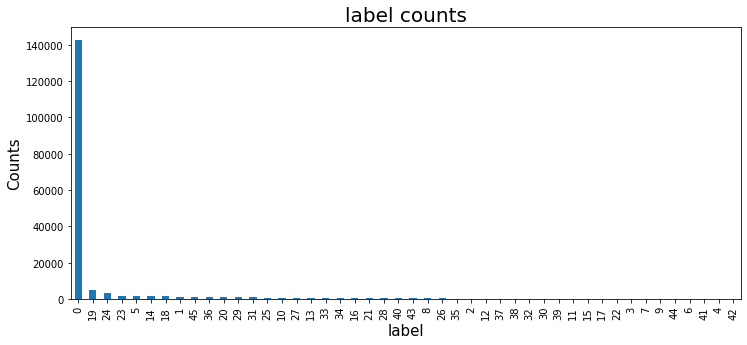

In [ ]:
#너무 0으로 인해 나머지 수가 잘 가늠이 안 감
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title('label counts',fontsize=20)

plt.ylabel('Counts',fontsize=15)
plt.xlabel('label',fontsize=15)
train['label'].value_counts().plot.bar()
plt.show()

## 2. 과제명, 요약문_연구목표 길이, 요약문_연구내용 길이, 요약문_기대효과 길이 컬럼 EDA

과제명 길이 최댓값: 229
과제명 길이 최솟값: 2
과제명 길이 평균값: 35.84252225995961
과제명 길이 중간값: 34.0


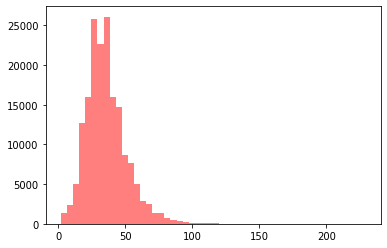

<Figure size 864x360 with 0 Axes>

In [ ]:
import numpy as np
length=train['과제명'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
#plt.title('histogram of length of task_name')
plt.figure(figsize=(12, 5))
#plt.boxplot(length, labels=['counts'], showmeans=True)
print('과제명 길이 최댓값: {}'.format(np.max(length)))
print('과제명 길이 최솟값: {}'.format(np.min(length)))
print('과제명 길이 평균값: {}'.format(np.mean(length)))
print('과제명 길이 중간값: {}'.format(np.median(length)))

요약문_연구목표 길이 최댓값: 3951
요약문_연구목표 길이 최솟값: 1
요약문_연구목표 길이 평균값: 318.1008066366807
요약문_연구목표 길이 중간값: 249.0


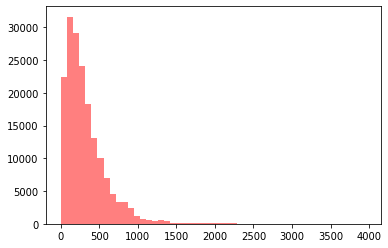

<Figure size 864x360 with 0 Axes>

In [ ]:
length=train['요약문_연구목표'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
#plt.title('histogram of length of summary_object')
plt.figure(figsize=(12, 5))
#plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_연구목표 길이 최댓값: {}'.format(np.max(length)))
print('요약문_연구목표 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구목표 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구목표 길이 중간값: {}'.format(np.median(length)))

요약문_연구내용 길이 최댓값: 3999
요약문_연구내용 길이 최솟값: 1
요약문_연구내용 길이 평균값: 699.2930282724435
요약문_연구내용 길이 중간값: 597.0


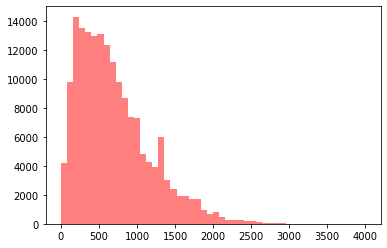

<Figure size 864x360 with 0 Axes>

In [ ]:
length=train['요약문_연구내용'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
#plt.title('histogram of length of summary_content')
plt.figure(figsize=(12, 5))
#plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_연구내용 길이 최댓값: {}'.format(np.max(length)))
print('요약문_연구내용 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구내용 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구내용 길이 중간값: {}'.format(np.median(length)))

요약문_기대효과 길이 최댓값: 3649
요약문_기대효과 길이 최솟값: 1
요약문_기대효과 길이 평균값: 400.4864374885258
요약문_기대효과 길이 중간값: 329.0


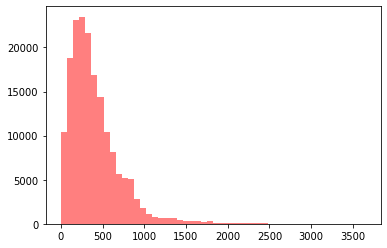

<Figure size 864x360 with 0 Axes>

In [ ]:
length=train['요약문_기대효과'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
#plt.title('histogram of length of summary_effect')
plt.figure(figsize=(12, 5))
#plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_기대효과 길이 최댓값: {}'.format(np.max(length)))
print('요약문_기대효과 길이 최솟값: {}'.format(np.min(length)))
print('요약문_기대효과 길이 평균값: {}'.format(np.mean(length)))
print('요약문_기대효과 길이 중간값: {}'.format(np.median(length)))